# Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Python14_cases/bank_clients_transactions.csv')

In [4]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [5]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

# Приведение столбцов к стилю camel_case/snake_case

In [6]:
import pandas as pd
import re

def camel_to_snake(name):
    # Убираем пробелы и скобки
    name = re.sub(r'[()\s]+', '_', name)
    # Добавляем нижнее подчёркивание перед заглавными буквами, кроме случаев, когда за буквой следуют ещё заглавные
    name = re.sub(r'(?<![A-Z])([A-Z])(?![A-Z][a-z])', r'_\1', name)
    # Приводим всё к нижнему регистру
    name = name.lower()
    # Убираем лишние подчёркивания
    name = re.sub(r'_+', '_', name).strip('_')
    return name

# Применяем функцию ко всем названиям столбцов
df.columns = [camel_to_snake(col) for col in df.columns]


In [7]:
df.columns

Index(['transaction_id', 'customer_id', 'customer_dob', 'cust_gender',
       'cust_location', 'cust_account_balance', 'transaction_date',
       'transaction_time', 'transaction_amount_inr'],
      dtype='object')

# Приведение типов данных

In [8]:
#привести дату к типу datetime

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1048567 non-null  object 
 1   customer_id             1048567 non-null  object 
 2   customer_dob            1045170 non-null  object 
 3   cust_gender             1047467 non-null  object 
 4   cust_location           1048416 non-null  object 
 5   cust_account_balance    1046198 non-null  float64
 6   transaction_date        1048567 non-null  object 
 7   transaction_time        1048567 non-null  int64  
 8   transaction_amount_inr  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [10]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

/tmp/ipython-input-3937442087.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])


In [11]:
df

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


# Поиск дублей и пропусков в данных

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transaction_id          1048567 non-null  object        
 1   customer_id             1048567 non-null  object        
 2   customer_dob            1045170 non-null  object        
 3   cust_gender             1047467 non-null  object        
 4   cust_location           1048416 non-null  object        
 5   cust_account_balance    1046198 non-null  float64       
 6   transaction_date        1048567 non-null  datetime64[ns]
 7   transaction_time        1048567 non-null  int64         
 8   transaction_amount_inr  1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 72.0+ MB


In [13]:
df.isna().sum()

,0
transaction_id,0
customer_id,0
customer_dob,3397
cust_gender,1100
cust_location,151
cust_account_balance,2369
transaction_date,0
transaction_time,0
transaction_amount_inr,0


In [14]:
df.query('customer_dob.isna() == True')
df.query('cust_gender.isna() == True')
df.query('cust_location.isna() == True')
df.query('cust_account_balance.isna() == True')

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr
29,T30,C8736958,19/12/86,M,GRAM PANCHAYTH HYDERABAD,NaN,2016-03-08,160636,2600.0
1271,T1272,C2314972,29/7/93,M,THANE,NaN,2016-10-21,203227,53.0
2513,T2514,C3742855,18/3/87,F,MUMBAI,NaN,2016-10-21,150602,300.0
2831,T2832,C3221342,27/2/02,M,NEW DELHI,NaN,2016-10-21,54746,1.0
3550,T3551,C5921379,27/2/02,M,NEW DELHI,NaN,2016-10-21,54704,1.0
...,...,...,...,...,...,...,...,...,...
1045875,T1045876,C4427246,25/4/80,M,SALEM,NaN,2016-09-18,131053,2363.0
1046193,T1046194,C4813286,29/11/95,F,INDORE,NaN,2016-09-18,20752,326.0
1046726,T1046727,C1035768,9/6/91,M,DELHI,NaN,2016-09-18,200816,7500.0
1046825,T1046826,C6231941,8/8/83,F,NAVI MUMBAI,NaN,2016-09-18,190130,9092.0


In [15]:
df = df.drop_duplicates().dropna()

# Исследовательский анализ данных

In [16]:
df

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [17]:
# сколько уникальных клиентов?

In [18]:
df.describe()

,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr
count,1.041614e+06,1041614,1.041614e+06,1.041614e+06
mean,1.149986e+05,2016-07-25 19:23:05.559718400,1.571221e+05,1.566096e+03
min,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,0.000000e+00
25%,4.728140e+03,2016-06-09 00:00:00,1.240410e+05,1.600000e+02
50%,1.676852e+04,2016-08-20 00:00:00,1.642470e+05,4.575000e+02
75%,5.742885e+04,2016-09-09 00:00:00,2.000220e+05,1.200000e+03
max,1.150355e+08,2016-12-09 00:00:00,2.359590e+05,1.560035e+06
std,8.467609e+05,NaN,5.126352e+04,6.561464e+03


In [19]:
unique_customers_count = df['customer_id'].nunique()

In [20]:
unique_customers_count

879358

In [21]:
unique_customers_count = df['customer_id'].dropna().nunique()

In [22]:
unique_customers_count

879358

In [23]:
# какое количество транзакций было совершено?

In [24]:
total_transactions = df['transaction_id'].count()

In [25]:
total_transactions

np.int64(1041614)

In [26]:
# сколько в среднем транзакций приходится на одного клиента?

In [27]:
avg_transactions_per_customer = round(total_transactions / unique_customers_count,2)

In [28]:
avg_transactions_per_customer

np.float64(1.18)

In [29]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount

<Axes: >

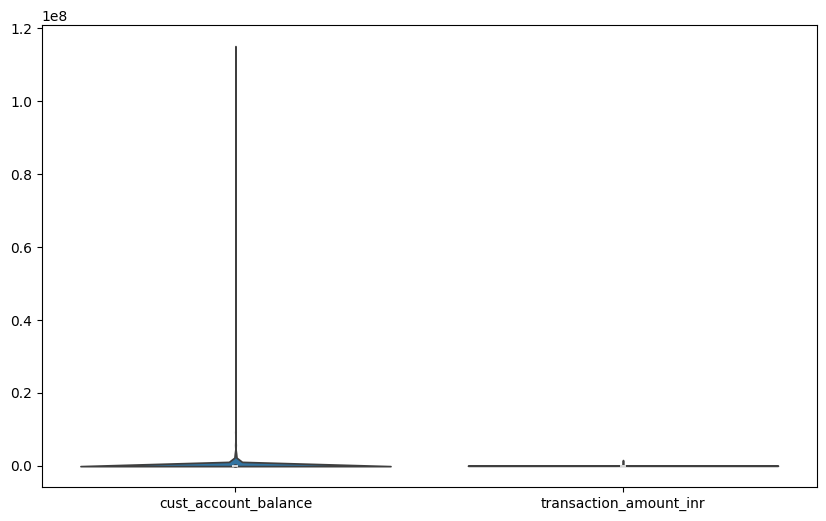

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагается, что df — ваш датафрейм
# Преобразуем колонки в числовой формат, если они не в таком формате
df['cust_account_balance'] = pd.to_numeric(df['cust_account_balance'], errors='coerce')
df['transaction_amount_inr'] = pd.to_numeric(df['transaction_amount_inr'], errors='coerce')

# Создаём фигуру для скрипичного графика
plt.figure(figsize=(10, 6))

# Строим скрипичный график
sns.violinplot(data=df[['cust_account_balance', 'transaction_amount_inr']])


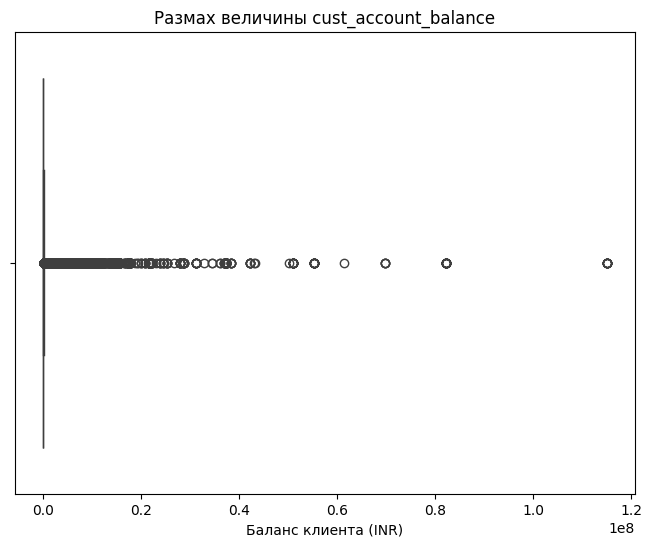

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем колонку в числовой формат, если она не в таком формате
df['cust_account_balance'] = pd.to_numeric(df['cust_account_balance'], errors='coerce')

# Строим box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cust_account_balance'])

# Добавляем подписи
plt.title('Размах величины cust_account_balance')
plt.xlabel('Баланс клиента (INR)')

# Показываем график
plt.show()


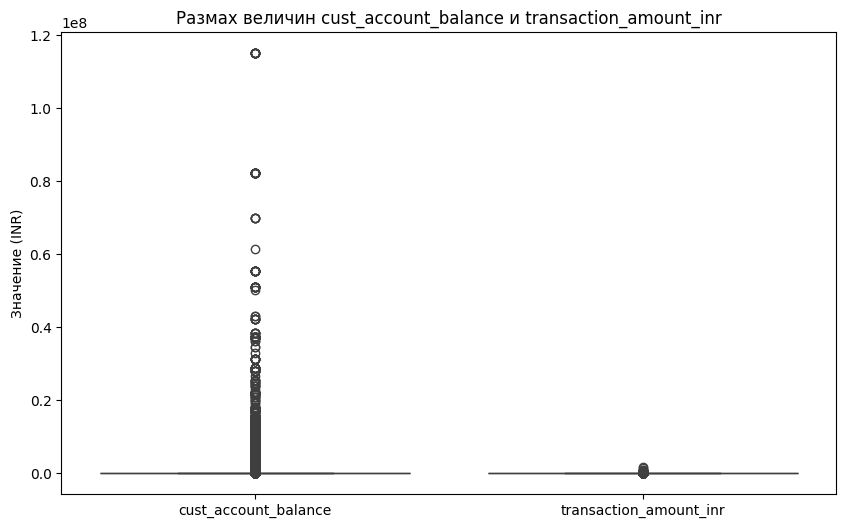

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем колонки в числовой формат
df['cust_account_balance'] = pd.to_numeric(df['cust_account_balance'], errors='coerce')
df['transaction_amount_inr'] = pd.to_numeric(df['transaction_amount_inr'], errors='coerce')

# Создаём датафрейм для удобного построения графика
plot_data = pd.melt(df, value_vars=['cust_account_balance', 'transaction_amount_inr'],
                    var_name='Variable', value_name='Value')

# Строим box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=plot_data)

# Добавляем подписи
plt.title('Размах величин cust_account_balance и transaction_amount_inr')
plt.ylabel('Значение (INR)')
plt.xlabel('')

# Показываем график
plt.show()


Вывод: Основная масса данных сосредоточена в узком диапазоне значений — почти все точки находятся близко к нулю или в области малых значений.Это говорит о том, что у большинства клиентов баланс на счёте относительно невысокий. Балансы клиентов (cust_account_balance) имеют значительный размах и большое количество выбросов, что может свидетельствовует о наличии небольшой группы клиентов с аномально высоким балансом.
Суммы транзакций (transaction_amount_inr) более однородны и не имеют значительных выбросов, что может указывать на стандартные, небольшие транзакции. Информация необходима для анализа сегментации клиентов или выявления аномалий для подготовки продуктов/предложений, соответствующих доходам Клиентов

In [33]:
# изучить возраст клиентов (визуализировать)

/tmp/ipython-input-1943275131.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['customer_dob'] = pd.to_datetime(df['customer_dob'], errors='coerce')


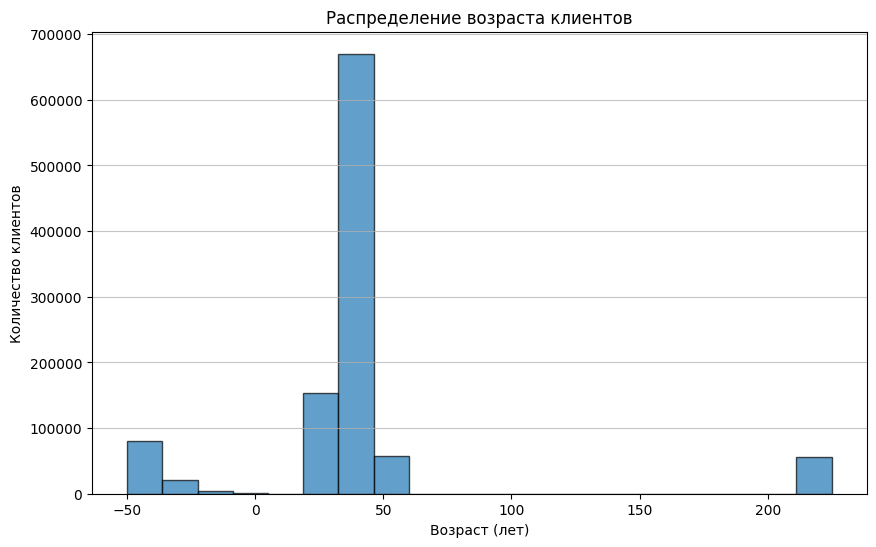

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем колонку customer_dob в формат datetime
df['customer_dob'] = pd.to_datetime(df['customer_dob'], errors='coerce')

# Рассчитываем возраст клиентов (на текущую дату)
current_date = pd.to_datetime('2025-09-04')  # Текущая дата
df['age'] = (current_date - df['customer_dob']) // pd.Timedelta(days=365.25)

# Строим гистограмму распределения возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество клиентов')
plt.grid(axis='y', alpha=0.75)

# Показываем график
plt.show()


Вывод: Большинство клиентов сосредоточено в возрастной группе около 40–50 лет. Это самая многочисленная категория, что видно по высокому столбцу на графике. Также, присутствует небольшой пик в возрасте около 200 лет и клиенты с отрицательным возрастом, что, скорее всего, является ошибкой в дате рождения или некорректными данными.

In [35]:
# изучить пол клиентов (визуализировать)

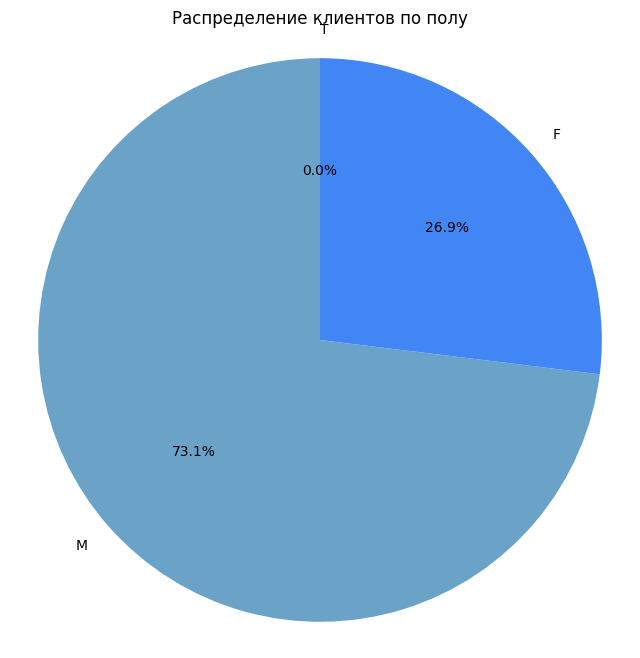

In [53]:
import matplotlib.pyplot as plt

# Подсчитываем количество клиентов каждого пола
gender_counts = df['cust_gender'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',  # Отображаем проценты с одним знаком после запятой
    startangle=90,  # Начальный угол для диаграммы
    colors=['#6BA3C8', '#4285F4', '#99C2E4']  # Сине-голубые цвета для сегментов
)
plt.title('Распределение клиентов по полу')
plt.axis('equal')  # Делаем круг равномерным

# Показываем диаграмму
plt.show()



Вывод: в основном, Клиентами являются мужчины (М) - более 70%

In [37]:
# изучить место жительства клиентов (визуализировать)

In [38]:
location_counts = df['cust_location'].value_counts()

In [39]:
location_counts

,count
cust_location,
MUMBAI,101997
NEW DELHI,84143
BANGALORE,81330
GURGAON,73594
DELHI,70549
...,...
PARK MIRA BHAYANDER ROAD THANE,1
24 PARGANAS SOUTH 24 PARGANAS,1
PREMISES KALYANI NAGAR PUNE,1


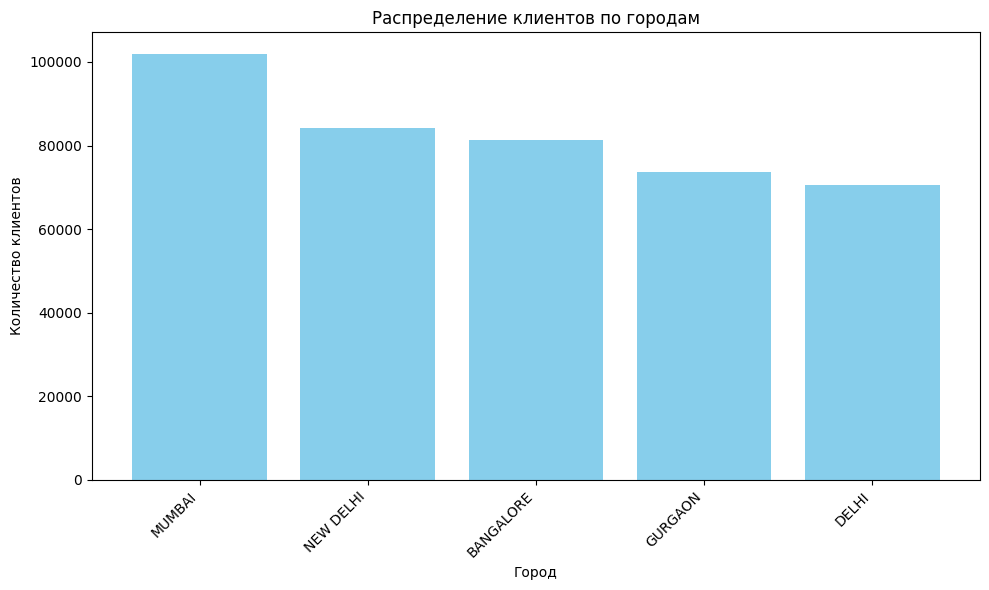

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Данные из таблицы
data = {
    'cust_location': ['MUMBAI', 'NEW DELHI', 'BANGALORE', 'GURGAON', 'DELHI'],
    'count': [101997, 84143, 81330, 73594, 70549]
}

# Создаём DataFrame
df_locations = pd.DataFrame(data)

# Строим убывающую столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(df_locations['cust_location'], df_locations['count'], color='skyblue')

# Добавляем подписи и настройки
plt.title('Распределение клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства чтения
plt.tight_layout()  # Автоматическая подстройка компоновки

# Показываем диаграмму
plt.show()


In [41]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID)

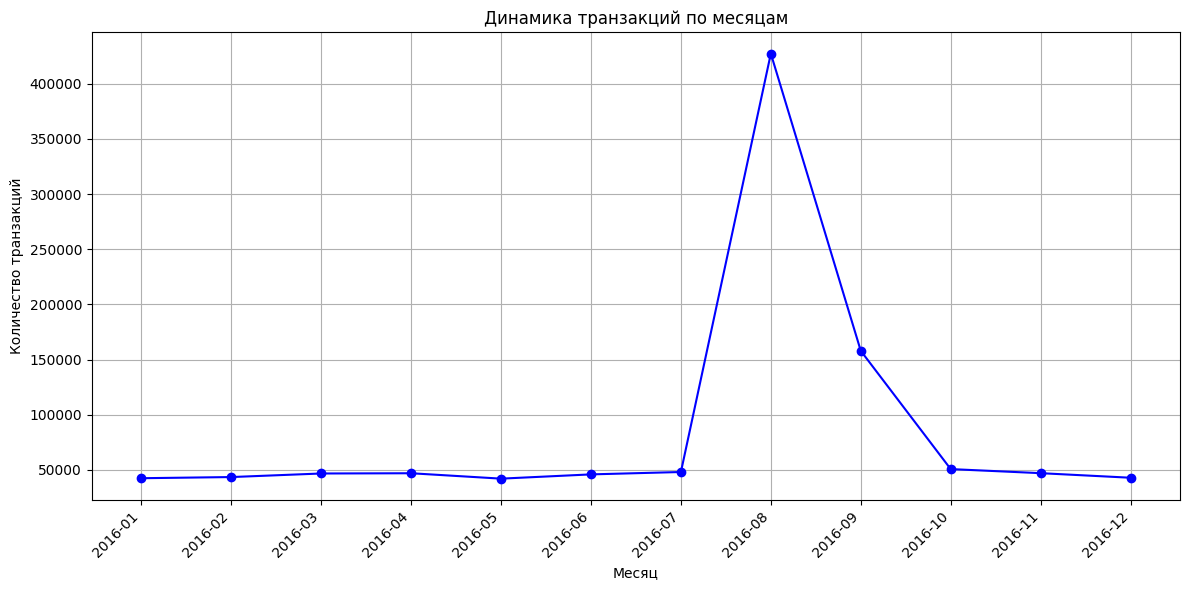

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем колонку transaction_date в формат datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Извлекаем год и месяц из даты транзакции
df['year_month'] = df['transaction_date'].dt.to_period('M')

# Группируем данные по месяцам и считаем количество транзакций
monthly_transactions = df.groupby('year_month').size()

# Преобразуем индекс в строку для удобства отображения
monthly_transactions.index = monthly_transactions.index.astype(str)

# Строим линейный график
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions.index, monthly_transactions.values, marker='o', linestyle='-', color='b')

# Добавляем подписи и настройки
plt.title('Динамика транзакций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства чтения
plt.grid(True)  # Добавляем сетку
plt.tight_layout()  # Автоматическая подстройка компоновки

# Показываем график
plt.show()


Вывод:С января по июль и с сентября по декабрь количество транзакций оставалось на относительно низком уровне — около 30,000–50,000 транзакций в месяц. В августе наблюдается значительный всплеск количества транзакций — более 400,000, что в несколько раз превышает показатели других месяцев.Это может быть связано с сезонными факторами, акциями, распродажами или другими событиями, которые стимулировали активность клиентов.

In [43]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)

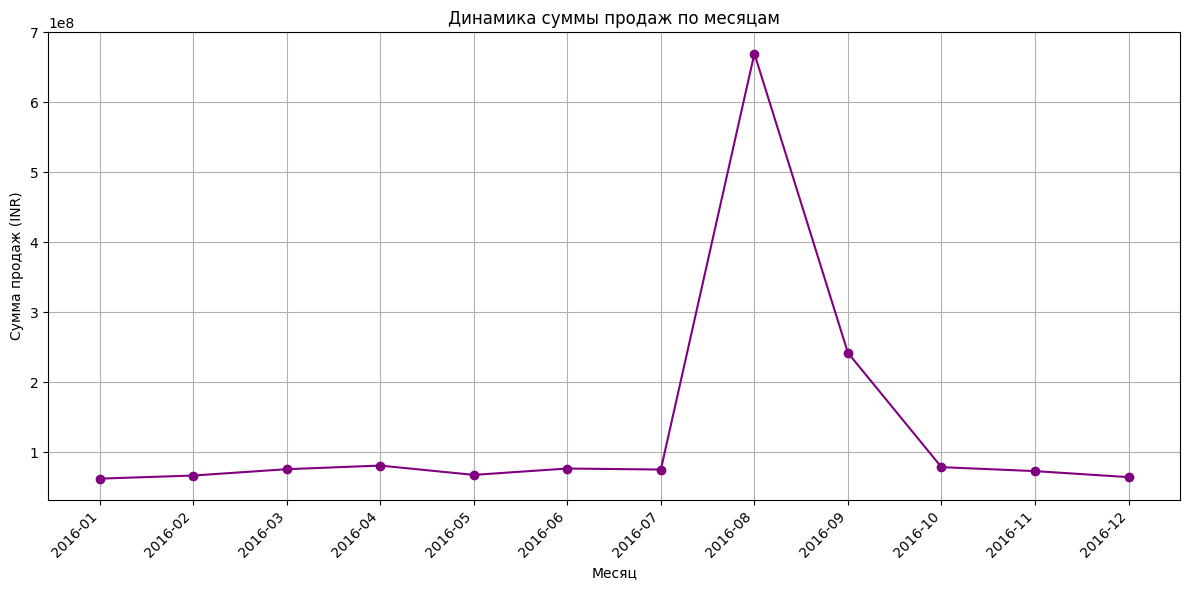

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем колонку transaction_date в формат datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Преобразуем колонку transaction_amount_inr в числовой формат
df['transaction_amount_inr'] = pd.to_numeric(df['transaction_amount_inr'], errors='coerce')

# Извлекаем год и месяц из даты транзакции
df['year_month'] = df['transaction_date'].dt.to_period('M')

# Группируем данные по месяцам и суммируем транзакции
monthly_sales_sum = df.groupby('year_month')['transaction_amount_inr'].sum()

# Преобразуем индекс в строку для удобства отображения
monthly_sales_sum.index = monthly_sales_sum.index.astype(str)

# Строим линейный график
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_sales_sum.index,
    monthly_sales_sum.values,
    marker='o',
    linestyle='-',
    color='purple'
)

# Добавляем подписи и настройки
plt.title('Динамика суммы продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж (INR)')
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства чтения
plt.grid(True)  # Добавляем сетку
plt.tight_layout()  # Автоматическая подстройка компоновки

# Показываем график
plt.show()


Вывод: также, как и в динамике количества транзакций, так и в динамике суммы транзакций Август — ключевой месяц с аномально высокой суммой продаж, что требует дополнительного анализа причин такого роста. В остальные месяцы сумма продаж оставалась стабильно низкой, что может указывать на необходимость стимулирования спроса или поиска других факторов для увеличения продаж

In [45]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

In [46]:
# Определяем возрастные группы с шагом 10-15 лет
bins = [0, 15, 30, 45, 60, 100]  # Возрастные группы: 0-15, 16-30, 31-45, 46-60, 61+
labels = ['0-15', '16-30', '31-45', '46-60', '61+']

# Разделяем клиентов на возрастные группы
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Проверяем распределение клиентов по возрастным группам
age_group_distribution = df['age_group'].value_counts().sort_index()

print("Распределение клиентов по возрастным группам:")
print(age_group_distribution)# посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

Распределение клиентов по возрастным группам:
age_group
0-15        151
16-30     28867
31-45    749045
46-60    102470
61+           0
Name: count, dtype: int64


In [47]:
# Преобразуем сумму транзакций в числовой формат
df['transaction_amount_inr'] = pd.to_numeric(df['transaction_amount_inr'], errors='coerce')

# Группируем данные по возрастным группам и считаем сумму транзакций
age_group_sales = df.groupby('age_group')['transaction_amount_inr'].sum().sort_values(ascending=False)

# Определяем самую платежеспособную группу
most_profitable_group = age_group_sales.idxmax()
most_profitable_sum = age_group_sales.max()

print("Сумма транзакций по возрастным группам:")
print(age_group_sales)
print(f"\nСамая платежеспособная группа: {most_profitable_group} (сумма транзакций: {most_profitable_sum:,.2f} INR)")

Сумма транзакций по возрастным группам:
age_group
31-45    8.921089e+08
46-60    2.021541e+08
16-30    2.446257e+07
0-15     4.698106e+05
61+      0.000000e+00
Name: transaction_amount_inr, dtype: float64

Самая платежеспособная группа: 31-45 (сумма транзакций: 892,108,903.07 INR)


/tmp/ipython-input-2719032624.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('age_group')['transaction_amount_inr'].sum().sort_values(ascending=False)


In [48]:
# посмотреть распределение транзакций по локациям и вывести топ-10 по кол-ву транзакций/сумме транзакций

In [49]:
import pandas as pd

# Преобразуем сумму транзакций в числовой формат
df['transaction_amount_inr'] = pd.to_numeric(df['transaction_amount_inr'], errors='coerce')

# Топ-10 городов по количеству транзакций
top_10_by_count = df['cust_location'].value_counts().head(10)

# Топ-10 городов по сумме транзакций
top_10_by_sum = df.groupby('cust_location')['transaction_amount_inr'].sum().nlargest(10)

# Выводим результаты
print("Топ-10 городов по количеству транзакций:")
print(top_10_by_count)
print("\nТоп-10 городов по сумме транзакций:")
print(top_10_by_sum)


Топ-10 городов по количеству транзакций:
cust_location
MUMBAI       101997
NEW DELHI     84143
BANGALORE     81330
GURGAON       73594
DELHI         70549
NOIDA         32656
CHENNAI       29840
PUNE          25690
HYDERABAD     22976
THANE         21397
Name: count, dtype: int64

Топ-10 городов по сумме транзакций:
cust_location
MUMBAI       1.747338e+08
NEW DELHI    1.584735e+08
BANGALORE    1.174852e+08
GURGAON      1.114485e+08
DELHI        1.051617e+08
KOLKATA      6.031786e+07
CHENNAI      4.427020e+07
NOIDA        4.424702e+07
PUNE         3.906549e+07
HYDERABAD    3.597353e+07
Name: transaction_amount_inr, dtype: float64


In [50]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

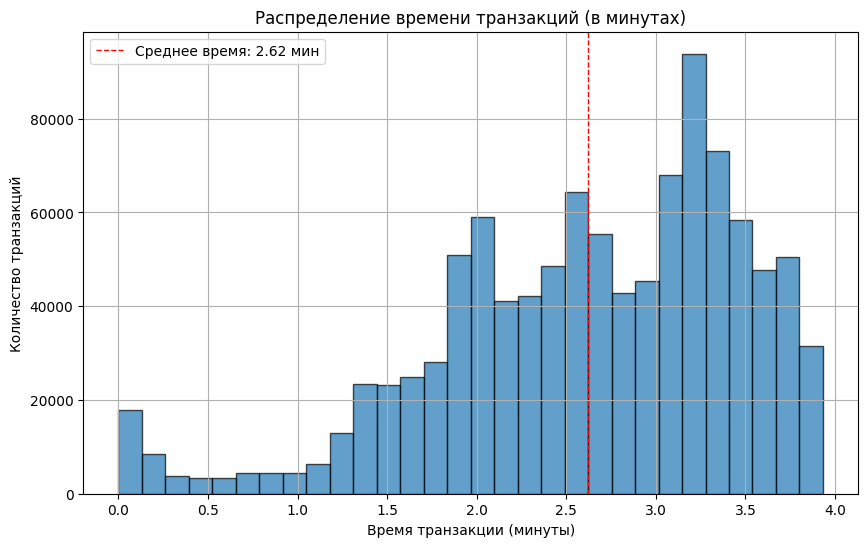

Среднее время транзакции: 2.62 минут


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что время транзакций хранится в колонке 'transaction_time_ms' в миллисекундах
# Переводим миллисекунды в минуты
df['transaction_time_min'] = df['transaction_time'] / (1000 * 60)

# Удаляем пропущенные или некорректные значения
df['transaction_time_min'] = df['transaction_time_min'].dropna()

# Находим среднее время транзакции
mean_transaction_time = df['transaction_time_min'].mean()

# Строим гистограмму распределения времени транзакций
plt.figure(figsize=(10, 6))
plt.hist(df['transaction_time_min'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение времени транзакций (в минутах)')
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Количество транзакций')
plt.grid(True)

# Показываем среднее время на графике
plt.axvline(mean_transaction_time, color='red', linestyle='dashed', linewidth=1, label=f'Среднее время: {mean_transaction_time:.2f} мин')
plt.legend()

# Показываем график
plt.show()

print(f"Среднее время транзакции: {mean_transaction_time:.2f} минут")


Вывод:Наиболее частое время выполнения транзакций находится в диапазоне 2–3 минут. Большинство транзакций выполняется быстро, что может свидетельствовать об эффективности процесса. Возможные задержки после 3 минут могут быть предметом для дальнейшего анализа и оптимизации

# Выводы

In [52]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

10 ключевых закономерностей, выявленных в ходе исследовательского анализа данных клиентов банка:
1.	Основная возрастная группа клиентов — большинство клиентов находятся в возрасте 40–50 лет.
2.	Аномалии в возрастных данных — присутствуют некорректные значения возраста (отрицательные и около 200 лет), что требует очистки данных.
3.	Распределение клиентов по полу — в основном клиенты банка представлены мужским полом, более 70%
4.	Географическое распределение — Мумбаи лидирует по количеству клиентов, за ним следуют Нью-Дели и Бангалор.
5.	Динамика количества транзакций по месяцам — резкий всплеск транзакций наблюдается в августе, в остальные месяцы активность стабильно низкая.
6.	Динамика суммы продаж по месяцам — в августе также наблюдается пик суммы продаж, что коррелирует с увеличением количества транзакций.
7.	Распределение времени транзакций — большинство транзакций занимает от 1 до 3.5 минут, со средним временем 2.62 минуты, что говорит о стабильности процесса.
8.	Самая платежеспособная возрастная группа - это группа 31–45 лет (на основе анализа сумм транзакций).
9.	Распределение сумм транзакций по городам — Мумбаи, Нью-Дели и Бангалор также лидируют по сумме транзакций, что соответствует количеству клиентов.
10.	Выбросы в данных — как по балансу клиентов (cust_account_balance), так и по суммам транзакций (transaction_amount_inr) присутствуют значительные выбросы, что может указывать на наличие VIP-клиентов или аномалий в данных.
Эти закономерности могут быть использованы для дальнейшего анализа, сегментации клиентов и оптимизации бизнес-процессов.
